In [4]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [5]:
from os import getcwd, chdir

chdir("../")  # Hate this, but quick and dirty
import pandas as pd
import numpy as np
import requests
import zipfile
import plotly.express as px
import plotly.graph_objs as go
import io
import gensim.downloader as api

from collections import namedtuple
from sklearn.metrics.pairwise import euclidean_distances
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors
from itertools import combinations
from codenames.codenames_board import CodenamesGame
from tqdm.auto import tqdm

DEBUG:blib2to3.pgen2.driver:NAME 'from' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'os' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NAME 'import' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NAME 'getcwd' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:COMMA ',' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'chdir' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NEWLINE '\n' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'chdir' (prefix='\n')
DEBUG:blib2to3.pgen2.driver:LPAR '(' (prefix='')
DEBUG:blib2to3.pgen2.driver:STRING '"../"' (prefix='')
DEBUG:blib2to3.pgen2.driver:RPAR ')' (prefix='')
DEBUG:blib2to3.pgen2.driver:NEWLINE '\n' (prefix='  # Hate this, but quick and dirty')
DEBUG:blib2to3.pgen2.driver:NAME 'import' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'pandas' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NAME 'as' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NAME 'pd' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NEWLINE '\n' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'import' (prefix='')
DEBUG:blib2to3.pg

<IPython.core.display.Javascript object>

In [49]:
api.info()

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1,
   'record_format': 'dict',
   'file_size': 6344358,
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py',
   'license': 'All files released for the task are free for general research use',
   'fields': {'2016-train': ['...'],
    '2016-dev': ['...'],
    '2017-test': ['...'],
    '2016-test': ['...']},
   'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.',
   'checksum': '701ea67acd82e75f95e1d8e62fb0ad29',
   'file_name': 'se

<IPython.core.display.Javascript object>

In [7]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

<IPython.core.display.Javascript object>

In [16]:
# model = api.load(model_name)  # download the model and return as object ready for use
# model.save(f"../models/{model_name}")
model.save("tester")

<IPython.core.display.Javascript object>

In [11]:
gensim.test.utils import get_tmpfile
fname = get_tmpfile("vectors.kv")

model.save(f"../models/tester")

FileNotFoundError: [Errno 2] No such file or directory: '../models/tester.vectors.npy'

<IPython.core.display.Javascript object>

### Helper Methods

In [6]:
def collect_model(model_name):
    model = api.load(
        model_name
    )  # download the model and return as object ready for use
    model.save(f"../models/{model_name}")


# model.most_similar("cat")
def load_vectors(fname):
    fin = io.open(fname, "r", encoding="utf-8", newline="\n", errors="ignore")
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(" ")
        data[tokens[0]] = [float(i) for i in tokens[1:]]

    return data


def get_vector_from_word(model, word):
    try:
        if (lower_word_vector := model.get_vector(word.lower())).all():
            return lower_word_vector
        if (capitalised_word_vector := model.get_vector(word.capitalize())).all():
            return capitalised_word_vector
        if (word_vector := model.get_vector(word)).all():
            return word_vector
    except KeyError:
        raise

DEBUG:blib2to3.pgen2.driver:NAME 'def' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'collect_model' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:LPAR '(' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'model_name' (prefix='')
DEBUG:blib2to3.pgen2.driver:RPAR ')' (prefix='')
DEBUG:blib2to3.pgen2.driver:COLON ':' (prefix='')
DEBUG:blib2to3.pgen2.driver:NEWLINE '\n' (prefix='')
DEBUG:blib2to3.pgen2.driver:INDENT '    ' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'model' (prefix='    ')
DEBUG:blib2to3.pgen2.driver:EQUAL '=' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NAME 'api' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:DOT '.' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'load' (prefix='')
DEBUG:blib2to3.pgen2.driver:LPAR '(' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'model_name' (prefix='\n        ')
DEBUG:blib2to3.pgen2.driver:RPAR ')' (prefix='\n    ')
DEBUG:blib2to3.pgen2.driver:NEWLINE '\n' (prefix='  # download the model and return as object ready for use')
DEBUG:blib2to3.pgen2.driver:NAME

DEBUG:blib2to3.pgen2.driver:RPAR ')' (prefix='')
DEBUG:blib2to3.pgen2.driver:RPAR ')' (prefix='')
DEBUG:blib2to3.pgen2.driver:RPAR ')' (prefix='')
DEBUG:blib2to3.pgen2.driver:DOT '.' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'all' (prefix='')
DEBUG:blib2to3.pgen2.driver:LPAR '(' (prefix='')
DEBUG:blib2to3.pgen2.driver:RPAR ')' (prefix='')
DEBUG:blib2to3.pgen2.driver:COLON ':' (prefix='')
DEBUG:blib2to3.pgen2.driver:NEWLINE '\n' (prefix='')
DEBUG:blib2to3.pgen2.driver:INDENT '            ' (prefix='')
DEBUG:blib2to3.pgen2.driver:NAME 'return' (prefix='            ')
DEBUG:blib2to3.pgen2.driver:NAME 'lower_word_vector' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NEWLINE '\n' (prefix='')
DEBUG:blib2to3.pgen2.driver:DEDENT '' (prefix='        ')
DEBUG:blib2to3.pgen2.driver:NAME 'if' (prefix='        ')
DEBUG:blib2to3.pgen2.driver:LPAR '(' (prefix=' ')
DEBUG:blib2to3.pgen2.driver:NAME 'capitalised_word_vector' (prefix='')
DEBUG:blib2to3.pgen2.driver:COLONEQUAL ':=' (prefix=' ')
DEBUG:blib2t

<IPython.core.display.Javascript object>

In [8]:
fname = "../data/wiki-news-300d-1M-subword.vec"
# vectors = load_vectors(fname)

model_name = "word2vec-google-news-300"
model_loc = "../models/wiki_news_subwords_300"
collect_model(model_name)
# model = KeyedVectors.load("models/wiki_news_subwords_300")

[--------------------------------------------------] 1.7% 28.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.8% 62.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.6% 93.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 8.0% 133.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.5% 190.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.9% 230.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.4% 272.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 18.8% 313.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.7% 360.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.2% 401.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.6% 442.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.0% 482.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.4% 522.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.9% 563.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.0% 747.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.4% 788.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.9% 829.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.9% 996.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.7% 1026.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.8% 1060.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.2% 1100.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.5% 1138.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.0% 1179.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.4% 1219.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.8% 1260.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.5% 1305.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.0% 1346.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.4% 1387.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.8% 1426.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.3% 1467.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.7% 1507.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


FileNotFoundError: [Errno 2] No such file or directory: '../models/word2vec-google-news-300.vectors.npy'

<IPython.core.display.Javascript object>

# Initial Exploration

In [ ]:
board_df = pd.read_hdf('data/10k_no_play.h5')
board = board_df.iloc[0]
cards = board.cards
card_vectors = [get_vector_from_word(model, c) for c in cards]

We have vectors, we have cards, let's get the distances and have a look to see if things make sense first..

In [ ]:
distances = euclidean_distances(card_vectors, card_vectors)

In [ ]:
px.imshow(distances, x=cards, y=cards)

In [ ]:
for idx,card in enumerate(cards):
    card_distances = list(distances[idx])
    minimum_distance = min(card_distances[:idx]+card_distances[idx+1:])
    print(f'minimum distance is {minimum_distance}')
    closest_idx = card_distances.index(minimum_distance)
    print(f'closest index for {card} is {(closest_card:=cards[closest_idx])}, at index {idx}')
    most_similar = model.most_similar(positive=[card.lower(), closest_card.lower()], topn=50, restrict_vocab=10000)
    most_similar = [w for w in most_similar if ((card.lower() not in w) and (closest_card.lower() not in w[0]))]
    print(most_similar)

Let's assume it's Blue's turn and compute the same stats as above, maybe using the assassin as a negative correlate.

In [ ]:
board

In [ ]:
blue_cards = [c.lower() for c in cards[board.blue_positions]]
red_cards =[c.lower() for c in cards[board.red_positions]]
assassin_card = cards[board.assassin_positions][0].lower()

blue_distances = []
for idx, c in enumerate(blue_cards):
    blue_distances+=[{'cards_compared':[c,x],'cosine_similarity':model.similarity(c, x)} for x in blue_cards[idx+1:]]
blue_distances = sorted(blue_distances, key =lambda x: x['cosine_similarity'], reverse=True)

If we take the blue distances we can rank and find the closest, from here we can compute the most similar word to each pair. After we can compare these potential clue words to ones generated with the assassin in mind.
Instead of looking at all, just looking at the top 3 pairs.

In [ ]:
blue_distances

In [ ]:
get_most_similar = lambda x,y=None: [y for y in model.most_similar_cosmul(positive=x,negative=y, topn=25) if ((x[0] not in y[0]) and (x[1] not in y[0]))]

top_3_pairs = [dict(**x,**{'most_similar': get_most_similar(x['cards_compared'])}) for x in blue_distances[:3]]
top_3_pairs = [dict(**x,**{'most_similar_with_assassin': get_most_similar(x['cards_compared'],[assassin_card])}) for x in top_3_pairs]
top_3_pairs

So we have the top three pairs and some potential geusses, we're being simple so the number of cards to guess is always 2. Luckily Gensim has our backs on this one.. Simples

In [ ]:
# top_3_pairs[0]['most_similar'][0]
top_3_pairs
# cards

In [ ]:
cards_lower = [c.lower() for c in cards]
for pair in top_3_pairs:
    guess_one_with_no_assassin = model.most_similar_to_given((most_similar := pair['most_similar'][0][0]), entities_list=cards_lower)
    guess_two_with_no_assassin = model.most_similar_to_given((most_similar := pair['most_similar'][0][0]), entities_list=[c for c in cards_lower if c != guess_one_with_no_assassin])

    guess_one_with_assassin = model.most_similar_to_given((most_similar_with_ass := pair['most_similar_with_assassin'][0][0]), entities_list=cards_lower)
    guess_two_with_assassin = model.most_similar_to_given((most_similar_with_ass := pair['most_similar_with_assassin'][0][0]), entities_list=[c for c in cards_lower if c != guess_one_with_assassin])
    c = pair['cards_compared']
    print(f'For spymaster clue {most_similar}, guesses are "{guess_one_with_no_assassin}" and "{guess_two_with_no_assassin}", actual cards are {c}')
    print(f'For spymaster clue, taking into account the assassin, {most_similar_with_ass}, guesses are "{guess_one_with_assassin}" and "{guess_two_with_assassin}", actual cards are {c}')


Let's play a game...

In [ ]:
def get_most_similar(positive_cards, negative_cards=None, include_score=False):
    try:
        return [
            (most_similar if include_score else most_similar[0])
            for most_similar in model.most_similar(
                positive=positive_cards, negative=negative_cards, topn=50
            )
            if all([c.lower() not in most_similar[0].lower() for c in positive_cards])
        ][0]
    except IndexError:
        return [
            (most_similar if include_score else most_similar[0])
            for most_similar in model.most_similar(
                positive=positive_cards, negative=negative_cards, topn=100
            )
            if all([c.lower() not in most_similar[0].lower() for c in positive_cards])
        ][0]


def play_spymaster(ally_cards, assassin, topn=5):
    distances = []
    ally_cards = ally_cards * 2 if len(ally_cards) == 1 else ally_cards
    for idx, c in enumerate(ally_cards):
        distances += [
            {"cards_compared": [c, x], "cosine_similarity": model.similarity(c, x)}
            for x in ally_cards[idx + 1 :]
        ]
    distances = sorted(distances, key=lambda x: x["cosine_similarity"], reverse=True)
    #     topn = topn if len(distances) > 1 else 1
    #     if topn == 1:
    #         print(distances)
    most_similar = sorted(
        [
            dict(
                **x,
                **{
                    "most_similar": get_most_similar(
                        x["cards_compared"], [assassin_card]
                    )
                },
            )
            for x in distances[:topn]
        ],
        key=lambda x: x["most_similar"][1],
        reverse=True,
    )[0]

    return most_similar


def smart_lower(word, model):
    checked = False
    adjusted = word.replace(" ", "").lower()
    try:
        model.get_vector(adjusted)
    except KeyError:
        adjusted = adjusted.capitalize()
        model.get_vector(adjusted)

    return adjusted


# while codenames_game.winning_team is None:
#     print("#" * 4, f"{codenames_game.current_team.capitalize()}'s turn", "#" * 4)
#     idxs = codenames_game.spymaster_map[codenames_game.current_team]
#     print(f"Remaining cards: {codenames_game.remaining_cards}")
#     ally_cards = [
#         smart_lower(c, model) for idx, c in enumerate(codenames_game.codename_cards) if ((idx in idxs) and not codenames_game.revealed[idx])
#     ]
#     print(f"Spymaster can see {ally_cards}")

#     spymaster_info_dict = play_spymaster(ally_cards, assassin_card)
#     print(f"Spymaster has selected word pair: {spymaster_info_dict['cards_compared']}")
#     clue = spymaster_info_dict["most_similar"][0]
#     print(f"Clue for the given pair is : {clue}")

#     remaining_cards = [
#         smart_lower(c, model)
#         for c in codenames_game.remaining_cards

#     ]
#     player_guess = model.most_similar_to_given(clue, remaining_cards)
#     print(f"Player has guessed: {player_guess}")
#     print(f'0-----{codenames_game.current_team}')
#     codenames_game.make_guess(player_guess.upper())
#     if codenames_game.round_score:
#         print(f"Player guessed correctly!")
#         remaining_cards = [
#             c.replace(" ", "").lower()
#             for idx, c in enumerate(codenames_game.codename_cards)
#             if not codenames_game.revealed[idx]
#         ]
#         player_guess = model.most_similar_to_given(clue, remaining_cards)
#         print(f"Player has guessed: {player_guess}")
#         codenames_game.make_guess(player_guess.upper())
#         if codenames_game.round_score == 2:
#             print(f"Player guessed correctly!")
#             print(f'2-----{codenames_game.current_team}')
#         codenames_game.next_turn()
#         print(f'3-----{codenames_game.current_team}')

#

#         distances = []
#         for idx, c in enumerate(ally_cards):
#             distances += [
#                 {"cards_compared": [c, x], "cosine_similarity": model.similarity(c, x)}
#                 for x in ally_cards[idx + 1 :]
#             ]
#         distances = sorted(
#             distances, key=lambda x: x["cosine_similarity"], reverse=True
#         )
#         # Take the top n pairs
#         #         for distance_pair in distances[:topn]:
#         #             print(get_most_similar(distance_pair["cards_compared"], [assassin_card]))
#         top_n_pairs = [
#             dict(
#                 **x,
#                 **{
#                     "most_similar": get_most_similar(
#                         x["cards_compared"], [assassin_card]
#                     )
#                 }
#             )
#             for x in distances[:topn]
#         ]
#         print(top_n_pairs)

In [ ]:
codenames_game = CodenamesGame(words_loc='codenames/words.txt')
topn = 3
assassin_card = codenames_game.codename_cards[
    codenames_game.spymaster_map["assassin"][0]
].lower()

codenames_game.codename_cards

In [ ]:
while codenames_game.winning_team is None: 
    print("#" * 4, f"{codenames_game.current_team.capitalize()}'s turn", "#" * 4)
    idxs = codenames_game.spymaster_map[codenames_game.current_team]
    print(f"Remaining cards: {codenames_game.remaining_cards}")
    ally_cards = [
        smart_lower(c, model) for idx, c in enumerate(codenames_game.codename_cards) if ((idx in idxs) and not codenames_game.revealed[idx])
    ]
    print(f"Spymaster can see {ally_cards}")

    spymaster_info_dict = play_spymaster(ally_cards, assassin_card)
    print(f"Spymaster has selected word pair: {spymaster_info_dict['cards_compared']}")
    clue = spymaster_info_dict["most_similar"][0]
    print(f"Clue for the given pair is : {clue}")
    guess_limit = 2
    teams_turn = True
    while teams_turn:
        current_score = codenames_game.round_score
        remaining_cards = [
            smart_lower(c, model)
            for c in codenames_game.remaining_cards

        ]
        player_guess = model.most_similar_to_given(clue, remaining_cards)
        
        print(f"Player has guessed: {player_guess}")
#     print(f'0-----{codenames_game.current_team}')
        guess_result = codenames_game.make_guess(player_guess.upper())
        codenames_game.current_team
        print(guess_result == codenames_game.current_team)
        guess_limit -= 1
        if codenames_game.round_score <= current_score:
            print(f"Player guessed incorrectly!")
            teams_turn = False
        if guess_limit == 0:
            codenames_game.next_turn()
            teams_turn = False
        print(f"Winning team: {codenames_game.winning_team}")



# Greedy Matrix Exploration

Code to create the word combination matrices, both the word combos themselves and the vector representation of those combo words.

In [153]:
codenames_game.spymaster_map

{'assassin': [21],
 'neutral': [7, 18, 9, 20, 19, 24, 16],
 'red': [17, 10, 8, 12, 6, 3, 22, 0],
 'blue': [5, 14, 13, 4, 1, 23, 15, 2, 11]}

<IPython.core.display.Javascript object>

In [154]:
def get_game_data(codenames_game):
    team = codenames_game.current_team
    enemy_team = "blue" if team == "red" else "blue"
    spymaster_map = codenames_game.spymaster_map
    print(enemy_team, team)
    cards = [smart_lower(card, model) for card in codenames_game.codename_cards]
    ally_cards = [c for i, c in enumerate(cards) if i in spymaster_map[team]]
    ally_cards = [smart_lower(ally_card, model) for ally_card in ally_cards]
    enemy_cards = [c for i, c in enumerate(cards) if i in spymaster_map[enemy_team]]
    enemy_cards = [smart_lower(enemy_card, model) for enemy_card in enemy_cards]
    assassin_card = cards[spymaster_map["assassin"][0]]

    return cards, ally_cards, enemy_cards, assassin_card, spymaster_map, team


def create_word_combinations_matrices(ally_cards, model, default_max_combo=5):
    max_combination = min(len(ally_cards), default_max_combo)
    ally_combinations = []
    for i in range(1, max_combination + 1):
        ally_combinations += list(combinations(ally_cards, i))

    ally_combination_vectors = [
        [model.get_vector(word) for word in combination]
        for combination in ally_combinations
    ]
    return ally_combinations, ally_combination_vectors


def get_most_similar_vectors_for_combos(word_combinations, negative_cards=[]):
    most_similar_words = [
        get_most_similar(
            positive_cards=list(combination), negative_cards=negative_cards
        )
        for combination in word_combinations
    ]

    return most_similar_words


ClueTuple = namedtuple("ClueTuple", ["clue", "intended_combo", "board_similarities"])


def create_clue_tuples(clues, word_combos, model):
    clue_tuples = []
    for clue, clue_words in zip(clues, word_combos):
        clue_tuples.append(
            ClueTuple(
                clue,
                clue_words,
                [(card, model.similarity(card, clue)) for card in cards],
            )
        )

    return clue_tuples


def create_clue_df(clue_tuples, cards):
    dataframe_tuples = []
    for clue, intended_combo, board_similarities in clue_tuples:
        dataframe_tuples.append(
            (
                clue,
                intended_combo,
                *[card_similarity[1] for card_similarity in board_similarities],
            )
        )

    return pd.DataFrame(
        dataframe_tuples, columns=["clue", "intended_combo"] + cards
    ).set_index(["clue", "intended_combo"])


def get_most_similar(positive_cards, negative_cards=None, include_score=False):
    try:
        return [
            (most_similar if include_score else most_similar[0])
            for most_similar in model.most_similar(
                positive=positive_cards,
                negative=negative_cards,
                topn=50,
                restrict_vocab=20000,
            )
            if all([c.lower() not in most_similar[0].lower() for c in positive_cards])
        ][0]
    except IndexError:
        return [
            (most_similar if include_score else most_similar[0])
            for most_similar in model.most_similar(
                positive=positive_cards,
                negative=negative_cards,
                topn=100,
                restrict_vocab=20000,
            )
            if all([c.lower() not in most_similar[0].lower() for c in positive_cards])
        ][0]


def play_spymaster(ally_cards, assassin, topn=5):
    distances = []
    ally_cards = ally_cards * 2 if len(ally_cards) == 1 else ally_cards
    for idx, c in enumerate(ally_cards):
        distances += [
            {"cards_compared": [c, x], "cosine_similarity": model.similarity(c, x)}
            for x in ally_cards[idx + 1 :]
        ]
    distances = sorted(distances, key=lambda x: x["cosine_similarity"], reverse=True)
    #     topn = topn if len(distances) > 1 else 1
    #     if topn == 1:
    #         print(distances)
    most_similar = sorted(
        [
            dict(
                **x,
                **{
                    "most_similar": get_most_similar(
                        x["cards_compared"], [assassin_card]
                    )
                },
            )
            for x in distances[:topn]
        ],
        key=lambda x: x["most_similar"][1],
        reverse=True,
    )[0]

    return most_similar


def smart_lower(word, model):
    checked = False
    adjusted = word.replace(" ", "").lower()
    try:
        model.get_vector(adjusted)
    except KeyError:
        adjusted = adjusted.capitalize()
        model.get_vector(adjusted)

    return adjusted

<IPython.core.display.Javascript object>

In [155]:
codenames_game = CodenamesGame(words_loc="codenames/words.txt")
cards, ally_cards, enemy_cards, assassin_card, spymaster_map, team = get_game_data(
    codenames_game
)
enemy_team = "blue" if team == "red" else "red"

blue red


<IPython.core.display.Javascript object>

In [163]:
ally_cards, assassin_card, team, enemy_cards

(['slug', 'hood', 'game', 'needle', 'boom', 'staff', 'alps', 'rome', 'scale'],
 'ketchup',
 'red',
 ['crown', 'torch', 'cap', 'block', 'pie', 'mail', 'port', 'mouse'])

<IPython.core.display.Javascript object>

In [245]:
word_combos, vector_combos = create_word_combinations_matrices(ally_cards, model)
# clues = get_most_similar_vectors_for_combos(word_combos, [assassin_card] + enemy_cards)
clues = get_most_similar_vectors_for_combos(word_combos, [assassin_card])

# clues = get_most_similar_vectors_for_combos(word_combos, )
clue_tuples = create_clue_tuples(clues, word_combos, model)

<IPython.core.display.Javascript object>

In [246]:
clue_df = create_clue_df(clue_tuples, cards)

<IPython.core.display.Javascript object>

The weighting of assasin, enemy, neutral and ally will have a bearing on the size of clue, below I run through different values for each to try and get a feel for how these values impact the final clue.

In [244]:
def calculate_best_clue(clue_df, spymaster_map, enemy_colour, team_colour, **kwargs):
    assassin_weight = kwargs.get("assassin_weight", -10)
    enemy_weight = kwargs.get("enemy_weight", -5)
    neutral_weight = kwargs.get("neutral_weight", 0)
    ally_weight = kwargs.get("ally_weight", 10)
    risk_weight = kwargs.get("risk_weight", 0)
    clue_score_threshold = kwargs.get("clue_score_threshold", 0)
    ally_cards_len = len(spymaster_map[team_colour])
    weighted_clue_df = clue_df.copy()
    weighted_clue_df["raw_clue_length"] = weighted_clue_df.index.get_level_values(
        "intended_combo"
    ).str.len()
    # clip scores below the threshold
    weighted_clue_df.iloc[:, spymaster_map[team_colour]] = (
        ally_df := weighted_clue_df.iloc[:, spymaster_map[team_colour]]
    ).where(ally_df >= clue_score_threshold, 0)
    # If clue word score is part of intended, but below threshold we reduce the clue length!
    weighted_clue_df["zero_values"] = weighted_clue_df.apply(
        pd.Series.value_counts, axis=1
    ).loc[:, 0]
    weighted_clue_df["actual_combo_length"] = (
        ally_cards_len - weighted_clue_df.zero_values
    )
    # Apply various weights
    weighted_clue_df.iloc[:, spymaster_map["assassin"]] = (
        weighted_clue_df.iloc[:, spymaster_map["assassin"]] * assassin_weight
    )
    weighted_clue_df.iloc[:, spymaster_map["neutral"]] = (
        weighted_clue_df.iloc[:, spymaster_map["neutral"]] * neutral_weight
    )
    weighted_clue_df.iloc[:, spymaster_map[enemy_colour]] = (
        weighted_clue_df.iloc[:, spymaster_map[enemy_colour]] * enemy_weight
    )
    weighted_clue_df.iloc[:, spymaster_map[team_colour]] = (
        weighted_clue_df.iloc[:, spymaster_map[team_colour]] * ally_weight
    )

    weighted_clue_df["weighted_score"] = weighted_clue_df.sum(axis=1)
    weighted_clue_df["weighted_score"] = weighted_clue_df.weighted_score + (
        weighted_clue_df.actual_combo_length * risk_weight
    )
    best_clue = weighted_clue_df.iloc[weighted_clue_df["weighted_score"].argmax()]

    return best_clue, weighted_clue_df


def compare_card_type_weights(clue_df, spymaster_map, team, **kwargs):
    enemy = "red" if team == "blue" else "blue"

    assassin_weights = kwargs.get("assassin_weights", -10)
    enemy_weights = kwargs.get("enemy_weights", -5)
    neutral_weights = kwargs.get("neutral_weights", 0)
    ally_weights = kwargs.get("ally_weights", 10)
    risk_weights = kwargs.get("risk_weights", 0)

    best_clues_for_weights = []

    for assassin_weight in assassin_weights:
        for enemy_weight in enemy_weights:
            for neutral_weight in neutral_weights:
                for ally_weight in ally_weights:
                    for risk_weight in risk_weights:
                        weighted_clue_df.iloc[:, spymaster_map["assassin"]] = (
                            weighted_clue_df.iloc[:, spymaster_map["assassin"]]
                            * assassin_weight
                        )
                        weighted_clue_df.iloc[:, spymaster_map["neutral"]] = (
                            weighted_clue_df.iloc[:, spymaster_map["neutral"]]
                            * neutral_weight
                        )
                        weighted_clue_df.iloc[:, spymaster_map[enemy]] = (
                            weighted_clue_df.iloc[:, spymaster_map[enemy]]
                            * enemy_weight
                        )
                        weighted_clue_df.iloc[:, spymaster_map[team]] = (
                            weighted_clue_df.iloc[:, spymaster_map[team]] * ally_weight
                        )

                        weighted_clue_df["weighted_score"] = weighted_clue_df.sum(
                            axis=1
                        )
                        weighted_clue_df["weighted_score"] = (
                            weighted_clue_df.weighted_score
                            + (weighted_clue_df.raw_clue_length * risk_weight)
                        )
                        best_clue = weighted_clue_df.iloc[
                            weighted_clue_df["weighted_score"].argmax()
                        ]

                        best_clues_for_weights.append(
                            {
                                "clue": best_clue.name[0],
                                "combo_length": len(best_clue.name[1]),
                                "intended_combo": best_clue.name[1],
                                "assassin_weight": assassin_weight,
                                "enemy_weight": enemy_weight,
                                "neutral_weight": neutral_weight,
                                "ally_weight": ally_weight,
                                "risk_weight": risk_weight,
                            }
                        )

    return best_clues_for_weights


# def zero_non_combo_ally_cards(df, ally_cards):
#     for idx, row in df.iterrows():
#         clue = idx[0]
#         intended_combo = list(idx[1])
#         non_combo_ally_words = [c for c in ally_cards if c not in intended_combo]
#         # Set all ally, non-clue scores to 0
#         df.loc[idx, non_combo_ally_words] = 0

#     return df

# def get_actual_combo_words(df, ally_cards):
#     for idx, row in df.iterrows():
#         clue = idx[0]
#         intended_combo = list(idx[1])
#         non_combo_ally_words = [c for c in ally_cards if c not in intended_combo]
#         # Set all ally, non-clue scores to 0
#         df.loc[idx, non_combo_ally_words] = 0

<IPython.core.display.Javascript object>

In [248]:
best_clue, weighted_df = calculate_best_clue(
    clue_df,
    spymaster_map,
    enemy_colour=enemy_team,
    team_colour=team,
    assassin_weight=-1,
    enemy_weight=-1,
    neutral_weight=-1,
    ally_weight=1,
    risk_weight=0,
    clue_score_threshold=0.5,
)

<IPython.core.display.Javascript object>

In [250]:
weighted_df.sort_values(["weighted_score"], ascending=False).head(500).style

<IPython.core.display.Javascript object>

A lot of duplicate clues as intended combos don't take into account the zero'd card values, we'll remove them and also create a new_combo column so that we can see the words the clue actually refers to.

In [301]:
test_df = weighted_df.copy()
print(test_df.shape)
# test_df["new_combo"] = np.empty((len(test_df), 0)).tolist()
#  Can be done with apply, doing it dirtily in the hope of a heavy refactor after the fact
new_combos = []
for idx, row in test_df.iterrows():
    intended_combo = idx[1]
    zero_values = row.loc[row == 0]
    new_combo = [c for c in intended_combo if c not in zero_values.index]
    new_combos.append(new_combo)

test_df["new_combo"] = new_combos
test_df = test_df[test_df.new_combo.map(len) >= 1]

test_df.reset_index(inplace=True)
# test_df.drop_duplicates(subset=["clue", "new_combo"], inplace=True)
test_df.shape

(381, 29)


(352, 32)

<IPython.core.display.Javascript object>

In [305]:
test_df["new_combo"].apply(pd.Series)

0    1
0      slug  NaN
1      hood  NaN
2      game  NaN
3    needle  NaN
4      boom  NaN
..      ...  ...
347    alps  NaN
348   staff  NaN
349    alps  NaN
350    alps  NaN
351    alps  NaN

[352 rows x 2 columns]

<IPython.core.display.Javascript object>

Index(['hood', 'game', 'needle', 'boom', 'staff', 'alps', 'rome', 'scale'], dtype='object')
('slug',)
crown                 -0.386709
torch                 -0.243731
cap                   -0.315689
contract              -0.331703
tube                  -0.395591
block                 -0.326008
pie                   -0.246283
slug                   0.560549
hood                          0
game                          0
compound              -0.360562
needle                        0
boom                          0
ketchup               -0.222182
shadow                -0.368294
staff                         0
alps                          0
mail                  -0.331716
rome                          0
wave                  -0.349546
port                  -0.362122
scale                         0
kangaroo              -0.297958
mouse                 -0.391865
england               -0.259282
raw_clue_length               1
zero_values                   8
actual_combo_length           1
we

crown     torch       cap  \
clue       intended_combo                                                     
parasite   (slug,)                            -0.386709 -0.243731 -0.315689   
canopy     (hood,)                            -0.501729 -0.341929 -0.400411   
tournament (game,)                            -0.427858 -0.262013 -0.353630   
pointer    (needle,)                          -0.293177 -0.348428 -0.274771   
bust       (boom,)                            -0.402812 -0.369140 -0.465265   
...                                                 ...       ...       ...   
mountain   (needle, boom, staff, alps, scale) -0.389736 -0.387178 -0.335238   
community  (needle, boom, staff, rome, scale) -0.307792 -0.291551 -0.267155   
mountain   (needle, boom, alps, rome, scale)  -0.389736 -0.387178 -0.335238   
           (needle, staff, alps, rome, scale) -0.389736 -0.387178 -0.335238   
           (boom, staff, alps, rome, scale)   -0.389736 -0.387178 -0.335238   

                                               contract      tube     block  \
clue       intended_combo                                                     
parasite   (slug,)                            -0.331703 -0.395591 -0.326008   
canopy     (hood,)                            -0.309061 -0.394474 -0.332411   
tournament (game,)                            -0.359073 -0.251171 -0.311390   
pointer    (needle,)                          -0.243358 -0.260760 -0.369161   
bust       (boom,)                            -0.369905 -0.380648 -0.466085   
...                                                 ...       ...       ...   
mountain   (needle, boom, staff, alps, scale) -0.270905 -0.362215 -0.351847   
community  (needle, boom, staff, rome, scale) -0.364837 -0.284236 -0.387043   
mountain   (needle, boom, alps, rome, scale)  -0.270905 -0.362215 -0.351847   
           (needle, staff, alps, rome, scale) -0.270905 -0.362215 -0.351847   
           (boom, staff, alps, rome, scale)   -0.270905 -0.362215 -0.351847   

                                                    pie      slug      hood  \
clue       intended_combo                                                     
parasite   (slug,)                            -0.246283  0.560549  0.000000   
canopy     (hood,)                            -0.253948  0.000000  0.533066   
tournament (game,)                            -0.206960  0.000000  0.000000   
pointer    (needle,)                          -0.331297  0.000000  0.000000   
bust       (boom,)                            -0.314708  0.000000  0.000000   
...                                                 ...       ...       ...   
mountain   (needle, boom, staff, alps, scale) -0.345931  0.000000  0.000000   
community  (needle, boom, staff, rome, scale) -0.277807  0.000000  0.000000   
mountain   (needle, boom, alps, rome, scale)  -0.345931  0.000000  0.000000   
           (needle, staff, alps, rome, scale) -0.345931  0.000000  0.000000   
           (boom, staff, alps, rome, scale)   -0.345931  0.000000  0.000000   

                                                   game  ...      wave  \
clue       intended_combo                                ...             
parasite   (slug,)                             0.000000  ... -0.349546   
canopy     (hood,)                             0.000000  ... -0.353454   
tournament (game,)                             0.662061  ... -0.343042   
pointer    (needle,)                           0.000000  ... -0.359898   
bust       (boom,)                             0.000000  ... -0.400034   
...                                                 ...  ...       ...   
mountain   (needle, boom, staff, alps, scale)  0.000000  ... -0.376055   
community  (needle, boom, staff, rome, scale)  0.000000  ... -0.359720   
mountain   (needle, boom, alps, rome, scale)   0.000000  ... -0.376055   
           (needle, staff, alps, rome, scale)  0.000000  ... -0.376055   
           (boom, staff, alps, rome, scale)    0.000000  ... -0.376055   

   

<IPython.core.display.Javascript object>

In [222]:
clue_score_threshold = 0.5
weighted_df.iloc[:, spymaster_map[team]] = (
    ally_df := weighted_df.iloc[:, spymaster_map[team]]
).where(ally_df >= clue_score_threshold, 0)

<IPython.core.display.Javascript object>

In [232]:
weighted_df.sort_values(["weighted_score"], ascending=False).head(500).style

<IPython.core.display.Javascript object>

Any ally cards that aren't in the clue shouldn't be used for final score (?)

In [190]:
zerod_clue_df = zero_non_combo_ally_cards(clue_df, ally_cards)

<IPython.core.display.Javascript object>

In [192]:
best_clue, zerod_weighted_df = calculate_best_clue(
    zerod_clue_df,
    spymaster_map,
    enemy_colour=enemy_team,
    team_colour=team,
    assassin_weight=-1,
    enemy_weight=-1,
    neutral_weight=1,
    ally_weight=1,
    risk_weight=0,
)

<IPython.core.display.Javascript object>

In [194]:
zerod_weighted_df.sort_values(["weighted_score"], ascending=False).head(500).style

<IPython.core.display.Javascript object>

In [195]:
ally_cards

['slug', 'hood', 'game', 'needle', 'boom', 'staff', 'alps', 'rome', 'scale']

<IPython.core.display.Javascript object>

Scores seem too similar and 5 word clues are being selected where human readability is hard.. Trying normalisation to widen the score ranges and hopefully introduce some more distinction.

In [135]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

<IPython.core.display.Javascript object>

In [168]:
mm = Normalizer()
normalised_clues = mm.fit_transform(clue_df)
normalised_clue_df = pd.DataFrame(
    normalised_clues, columns=clue_df.columns, index=clue_df.index
)

<IPython.core.display.Javascript object>

In [169]:
best_clue, weighted_normlised_df = calculate_best_clue(
    normalised_clue_df,
    spymaster_map,
    enemy_colour=enemy_team,
    team_colour=team,
    assassin_weight=-1,
    enemy_weight=-1,
    neutral_weight=-1,
    ally_weight=1,
    risk_weight=1,
)

<IPython.core.display.Javascript object>

In [170]:
weighted_normlised_df.sort_values(["weighted_score"], ascending=False).head(500).style

<IPython.core.display.Javascript object>

In [167]:
enemy_cards, ally_cards

(['crown', 'torch', 'cap', 'block', 'pie', 'mail', 'port', 'mouse'],
 ['slug', 'hood', 'game', 'needle', 'boom', 'staff', 'alps', 'rome', 'scale'])

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbe0e4d940>,
      dtype=object)

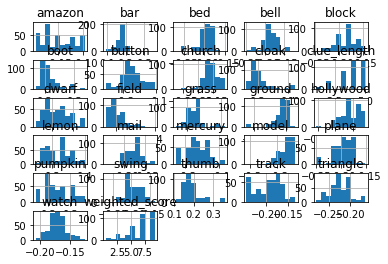

<IPython.core.display.Javascript object>

In [139]:
weighted_normlised_df.hist()

In [130]:
cards, ally_cards, enemy_cards, assassin_card

(['plane',
  'boot',
  'field',
  'bed',
  'bar',
  'grass',
  'amazon',
  'church',
  'model',
  'button',
  'hollywood',
  'lemon',
  'swing',
  'thumb',
  'dwarf',
  'cloak',
  'bell',
  'track',
  'mail',
  'ground',
  'block',
  'watch',
  'mercury',
  'pumpkin',
  'triangle'],
 ['boot',
  'field',
  'bar',
  'grass',
  'lemon',
  'thumb',
  'dwarf',
  'cloak',
  'pumpkin'],
 ['boot',
  'field',
  'bar',
  'grass',
  'lemon',
  'thumb',
  'dwarf',
  'cloak',
  'pumpkin'],
 'watch')

<IPython.core.display.Javascript object>

In [ ]:
# Arbtitrariy set these values for now, in an RL space these would be learned
assassin_weights = list(range(-10, 2, 2))
enemy_weights = list(range(-10, 2, 2))
neutral_weights = list(range(-10, 2, 2))
ally_weights = list(range(0, 12, 2))
risk_weights = list(np.arange(0, 1.1, 0.1))

best_clues_for_weights = compare_card_type_weights(
    clue_df,
    spymaster_map,
    team,
    assassin_weights=assassin_weights,
    enemy_weights=enemy_weights,
    neutral_weights=neutral_weights,
    ally_weights=ally_weights,
    risk_weights=risk_weights,
)

In [ ]:
clues_for_weights_df = pd.DataFrame.from_records(best_clues_for_weights)
pd.DataFrame(clues_for_weights_df.groupby(["assassin_weight","enemy_weight","neutral_weight","ally_weight","risk_weight"])["combo_length"].mean()).style


In [ ]:
# Going to compare weights for multiple board states to get a better idea of the effect of weight changes
game_states_to_test = 50

assassin_weights = list(range(-10, 2, 2))
enemy_weights = list(range(-10, 2, 2))
neutral_weights = list(range(-10, 2, 2))
ally_weights = list(range(0, 12, 2))

best_clues_for_all_states = []
for i in tqdm(range(game_states_to_test)):
    codenames_game = CodenamesGame(words_loc="codenames/words.txt")
    cards, ally_cards, assassin_card, spymaster_map, team = get_game_data(
        codenames_game
    )

    word_combos, vector_combos = create_word_combinations_matrices(ally_cards, model)
    clues = get_most_similar_vectors_for_combos(word_combos, [assassin_card])
    clue_tuples = create_clue_tuples(clues, word_combos, model)

    clue_df = create_clue_df(clue_tuples, cards)
    best_clues_for_state = compare_card_type_weights(
        clue_df,
        spymaster_map,
        team,
        assassin_weights,
        enemy_weights,
        neutral_weights,
        ally_weights,
    )
    best_clues_for_all_states.extend(best_clues_for_state)

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
def highlight_col(df, spymaster_map):
    r = 'background-color: red'
    b = 'background-color: blue'
    a = 'background-color: grey'
    y = 'background-color: yellow'
    
    df[:, [idx+2 for idx in spymaster_map['red']]] = r
    df[:, [idx+2 for idx in spymaster_map['blue']]] = b
    df[:, [idx+2 for idx in spymaster_map['assassin']]] = a
    df[:, [idx+2 for idx in spymaster_map['neutral']]] = y
    
    return df  

def highlight_(s):
    color = 'grey'
    return 'background-color: %s' % color

data.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['B', 'C']])
df.style.apply(highlight_col, axis=None)

In [ ]:
clue_df.style

In [ ]:
px.imshow([[1, 2, 3]])

In [ ]:
ally_combinations = (
    list(combinations(ally_cards, 2))
    + list(combinations(ally_cards, 3))
    + list(combinations(ally_cards, 4))
    + list(combinations(ally_cards, 5))
)

In [ ]:
ally_combinations[0]

In [ ]:
ally_combination_vectors = [
    [model.get_vector(word) for word in combination]
    for combination in ally_combinations
]
mean_vectors = [
    np.mean(vector_combo, axis=0) for vector_combo in ally_combination_vectors
]
most_similar_words = [
    get_most_similar(positive_cards=list(combination))
    for combination in ally_combinations
]

In [ ]:
most_similar_words[1], ally_combinations[1]

In [ ]:
model.cosine_similarities()

In [ ]:
model.most_similar(positive=ally_combination_vectors[0], topn=50), ally_combinations[0]

########

In [ ]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(all_words)

In [ ]:
plt.scatter(trans.embedding_[blue_positions, 0], trans.embedding_[blue_positions, 1], s= 5,c='b', cmap='Spectral')
plt.scatter(trans.embedding_[red_positions, 0], trans.embedding_[red_positions, 1], s= 5,c='r', cmap='Spectral')
plt.scatter(trans.embedding_[neutral_positions, 0], trans.embedding_[neutral_positions, 1], s= 5,c='y', cmap='Spectral')
plt.scatter(trans.embedding_[assassin_positions, 0], trans.embedding_[assassin_positions, 1], s= 5,c='k', cmap='Spectral')

for label, x, y in zip(cards, trans.embedding_[:, 0], trans.embedding_[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:
blue_positions

In [ ]:
import numpy as np
import csv
import logging
from numpy import delete, random as random
from random import sample

logging.basicConfig(level=logging.DEBUG)
# WORDS = "words.txt"


class CodenamesGame:
    """Codenames board represents the state of the game at any given time,
    allows for construction, per team play and guesses
    """

    def __init__(self, custom_cards=None, custom_map=None, is_played=False, words_loc='words.txt'):
        self.current_team = "red" if random.randint(2) else "blue"
        self.winning_team = None
        self.round_score = 0
        self.revealed = [False]*25
        self.custom_cards = custom_cards
        self.custom_map = custom_map
        self.word_loc = words_loc
        if self.custom_cards is not None:
            self.codename_cards = self.custom_cards
        else:
            self.codename_cards = self.get_cards()
        if self.custom_map is not None:
            self.spymaster_map = self.custom_map
        else:
            self.spymaster_map = self.generate_map()

    def __repr__(self):
        remaining_cards = [c for idx, c in enumerate(self.codename_cards) if not self.revealed[idx]]
        return f"remaining cards ({len(remaining_cards)}): {remaining_cards}\nspymaster map: {self.spymaster_map}"

    def get_game(self):
        return dict(
            cards=self.codename_cards,
            blue_positions=self.spymaster_map["blue"],
            red_positions=self.spymaster_map["red"],
            neutral_positions=self.spymaster_map["neutral"],
            assassin_positions=self.spymaster_map["assassin"],
            revealed=self.revealed,
            current_team=self.current_team,
        )

    def get_cards(self):
        with open(self.word_loc, "r", newline="\n") as inputfile:
            words = inputfile.read().split("\n")
        return random.choice(words, 25)

    def get_current_turn(self):
        return self.current_team
    
    def generate_map(self):
        """Randomly creates the mapping that the spymaster will see at the start of the game

        Returns:
            array -- an array of shape (25,1) representing the locations of the agents and neutrals
        """
        board_indexes = np.arange(0, 25)
        agent_numbers = dict(assassin=1, neutral=7)
        agent_numbers["red"] = 9 if self.current_team == "red" else 8
        agent_numbers["blue"] = 9 if self.current_team == "blue" else 8

        agent_positions = dict()
        for agent_type, agent_number in agent_numbers.items():
            agent_positions[agent_type], board_indexes = self.collect_agents(
                board_indexes, agent_number
            )

        return agent_positions

    def collect_agents(self, available_board_indexes, to_select):
        agents = sample(list(available_board_indexes), to_select)
        available_board_indexes = [
            bi for bi in available_board_indexes if bi not in agents
        ]
        return agents, available_board_indexes

    def make_guess(self, word):
        logging.info(f"{self.current_team} guesses {word}")
        agent_type = self.process_guess(word)
        print(agent_type)
        if agent_type == "assassin":
            self.round_score -= 9
            self.winning_team = "red" if self.current_team == "blue" else "blue"
            logging.info(f"{self.winning_team} wins!")

            return None
        if agent_type == self.current_team:
            logging.info(f"{self.current_team} guessed correctly!")
            self.round_score += 1
        if agent_type == "neutral":
            logging.info(f"{self.current_team} tagged a neutral")
            self.next_turn()
        if agent_type != self.current_team:
            logging.info(f"ooft, {self.current_team} revealed an enemy")
            self.round_score -= 1
            self.next_turn()

    def process_guess(self, word):
        """Runs through the board state and marks the word as revealed, 
        and returns the card type that was revealed

        Arguments:
            word {string} -- word guessed

        Returns:
            string -- the type of agent revealed
        """
        word_idx = self.codename_cards.tolist().index(word)
        self.revealed[word_idx] = True

        for agent_type, word_list in self.spymaster_map.items():
            if word_idx in word_list:
                return agent_type

        return "No card found!!!"

    def next_turn(self):
        self.current_team = "red" if self.current_team == "blue" else "blue"
        self.round_score = 0


In [ ]:
codenames_game = CodenamesGame(words_loc='codenames/words.txt')


In [ ]:
codenames_game

In [ ]:
random.choice(['d','f','g','h'], 3)